In [ ]:
### PHASE 1: DATA UNDERSTANDING AND PREPERATION

# Install and import libraries

import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Download dataset with kagglehub

import kagglehub

# Download latest version of the dataset

path = kagglehub.dataset_download(
    "atharvasoundankar/gen-ai-misinformation-detection-datase-20242025"
)

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'gen-ai-misinformation-detection-datase-20242025' dataset.
Path to dataset files: /kaggle/input/gen-ai-misinformation-detection-datase-20242025


In [ ]:
# List contents of download directory

import os

print("Files in dataset download folder:")
for each in os.listdir(path):
    print("-", each)

Files in dataset download folder:
- generative_ai_misinformation_dataset.csv


In [ ]:
# Load main CSV into pandas

CSV_FILE = "generative_ai_misinformation_dataset.csv"

csv_path = os.path.join(path, CSV_FILE)
print("Loading:", csv_path)

df = pd.read_csv(csv_path)
df.head()


Loading: /kaggle/input/gen-ai-misinformation-detection-datase-20242025/generative_ai_misinformation_dataset.csv


,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
0,1,P0001,Reddit,2024-03-06 10:01:00,2024-03-06,10:01:00,March,Wednesday,USA,New York,...,-0.223,0.271,GPT-like,0.829,0.357,TRUE,4,0.543,3899,1
1,2,P0002,Reddit,2025-08-07 18:30:00,2025-08-07,18:30:00,August,Thursday,Germany,Berlin,...,-0.718,0.802,GPT-like,0.075,0.987,FALSE,3,0.199,7651,0
2,3,P0003,Telegram,2024-12-13 03:15:00,2024-12-13,03:15:00,December,Friday,USA,New York,...,-0.989,0.815,GPT-like,0.707,0.729,PARTLY,0,0.074,7260,0
3,4,P0004,Twitter,2024-04-05 07:10:00,2024-04-05,07:10:00,April,Friday,USA,Chicago,...,-0.283,0.116,human,0.863,0.623,FALSE,2,0.064,7454,1
4,5,P0005,Telegram,2024-06-07 06:18:00,2024-06-07,06:18:00,June,Friday,Germany,Hamburg,...,-0.378,0.325,GPT-like,0.730,0.638,PARTLY,0,0.472,8320,0


In [ ]:
# Checking data structure

## Shape, column names, preview

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

## Data types and missing values

df.info()
df.isna().sum().sort_values(ascending=False)

Shape: (500, 31)

Columns: ['id', 'post_id', 'platform', 'timestamp', 'date', 'time', 'month', 'weekday', 'country', 'city', 'timezone', 'author_id', 'author_followers', 'author_verified', 'text', 'text_length', 'token_count', 'readability_score', 'num_urls', 'num_mentions', 'num_hashtags', 'sentiment_score', 'toxicity_score', 'model_signature', 'detected_synthetic_score', 'embedding_sim_to_facts', 'factcheck_verdict', 'external_factchecks_count', 'source_domain_reliability', 'engagement', 'is_misinformation']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         500 non-null    int64  
 1   post_id                    500 non-null    object 
 2   platform                   500 non-null    object 
 3   timestamp                  500 non-null    object 
 4   date                       500 non-nul

,0
id,0
post_id,0
platform,0
timestamp,0
date,0
time,0
month,0
weekday,0
country,0
city,0


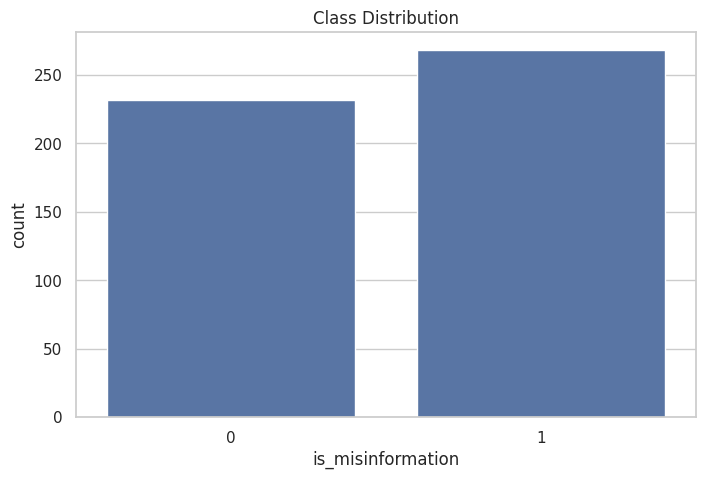

In [ ]:
# Inspect target variable (is_misinformation) distribution

TARGET = "is_misinformation"

if TARGET not in df.columns:
    raise KeyError(f"Target column '{TARGET}' not found. Check df.columns.")

## Distribution

df[TARGET].value_counts()

## Percentage

df[TARGET].value_counts(normalize=True)

## Plot

sns.countplot(x=TARGET, data=df)
plt.title("Class Distribution")
plt.show()


In [ ]:
# Identify numeric, categorical, text, and ID/time columns

## Define target + group ID/time/text columns

# 1) Target column for classification

TARGET = "is_misinformation"

# 2) Columns that are identifiers (probably not used as features)

ID_COLS = ["id", "post_id", "author_id"]

# 3) Columns that represent time/date information

TIME_COLS = ["timestamp", "date", "time", "month", "weekday"]

  # Might later include features for "hour of day" or "day of week"

# 4) Main free-text column

TEXT_COLS = ["text"]

## Using dtypes to get numeric vs. "object"

  # We know from df.info():
  ## float64 + int64 = numeric
  ## object = string-like (IDs, text, category labels, etc.)

import numpy as np

# All numeric columns (int64, float64)

numeric_all = df.select_dtypes(include=[np.number]).columns.tolist()

# All object / category columns

categorical_all = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("All numeric columns:", numeric_all)
print("\nAll object-like columns:", categorical_all)


All numeric columns: ['id', 'author_followers', 'author_verified', 'text_length', 'token_count', 'readability_score', 'num_urls', 'num_mentions', 'num_hashtags', 'sentiment_score', 'toxicity_score', 'detected_synthetic_score', 'embedding_sim_to_facts', 'external_factchecks_count', 'source_domain_reliability', 'engagement', 'is_misinformation']

All object-like columns: ['post_id', 'platform', 'timestamp', 'date', 'time', 'month', 'weekday', 'country', 'city', 'timezone', 'author_id', 'text', 'model_signature', 'factcheck_verdict']


In [ ]:
# Building feature groups

## 1) Numeric feature columns:

  # Start from numeric_all
  # Remove target and numeric IDs

numeric_features = [
    col for col in numeric_all
    if col not in [TARGET] + ["id"]  # we keep author_verified as numeric (0/1)
]

print("Numeric feature columns:")
print(numeric_features)

## 2) Text feature columns (we already defined TEXT_COLS)

text_features = [col for col in TEXT_COLS if col in df.columns]

print("\nText feature columns:")
print(text_features)

## 3) Categorical feature columns:

  # Start from all object-like columns
  # Remove text column(s)
  # Remove obvious ID/time-like columns

categorical_features = [
    col for col in categorical_all
    if col not in TEXT_COLS + ID_COLS + TIME_COLS
]

print("\nCategorical feature columns:")
print(categorical_features)

## Inspecting categorical features

for col in categorical_features:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))


Numeric feature columns:
['author_followers', 'author_verified', 'text_length', 'token_count', 'readability_score', 'num_urls', 'num_mentions', 'num_hashtags', 'sentiment_score', 'toxicity_score', 'detected_synthetic_score', 'embedding_sim_to_facts', 'external_factchecks_count', 'source_domain_reliability', 'engagement']

Text feature columns:
['text']

Categorical feature columns:
['platform', 'country', 'city', 'timezone', 'model_signature', 'factcheck_verdict']

Column: platform
platform
Twitter     129
Facebook    126
Telegram    124
Reddit      121
Name: count, dtype: int64

Column: country
country
Germany    113
USA        105
UK         102
Brazil      94
India       86
Name: count, dtype: int64

Column: city
city
Los Angeles    51
Munich         40
Hamburg        38
Sao Paulo      38
Manchester     36
Berlin         35
Birmingham     34
Delhi          33
Brasilia       33
London         32
Name: count, dtype: int64

Column: timezone
timezone
CET    113
EST    105
GMT    102
BRT

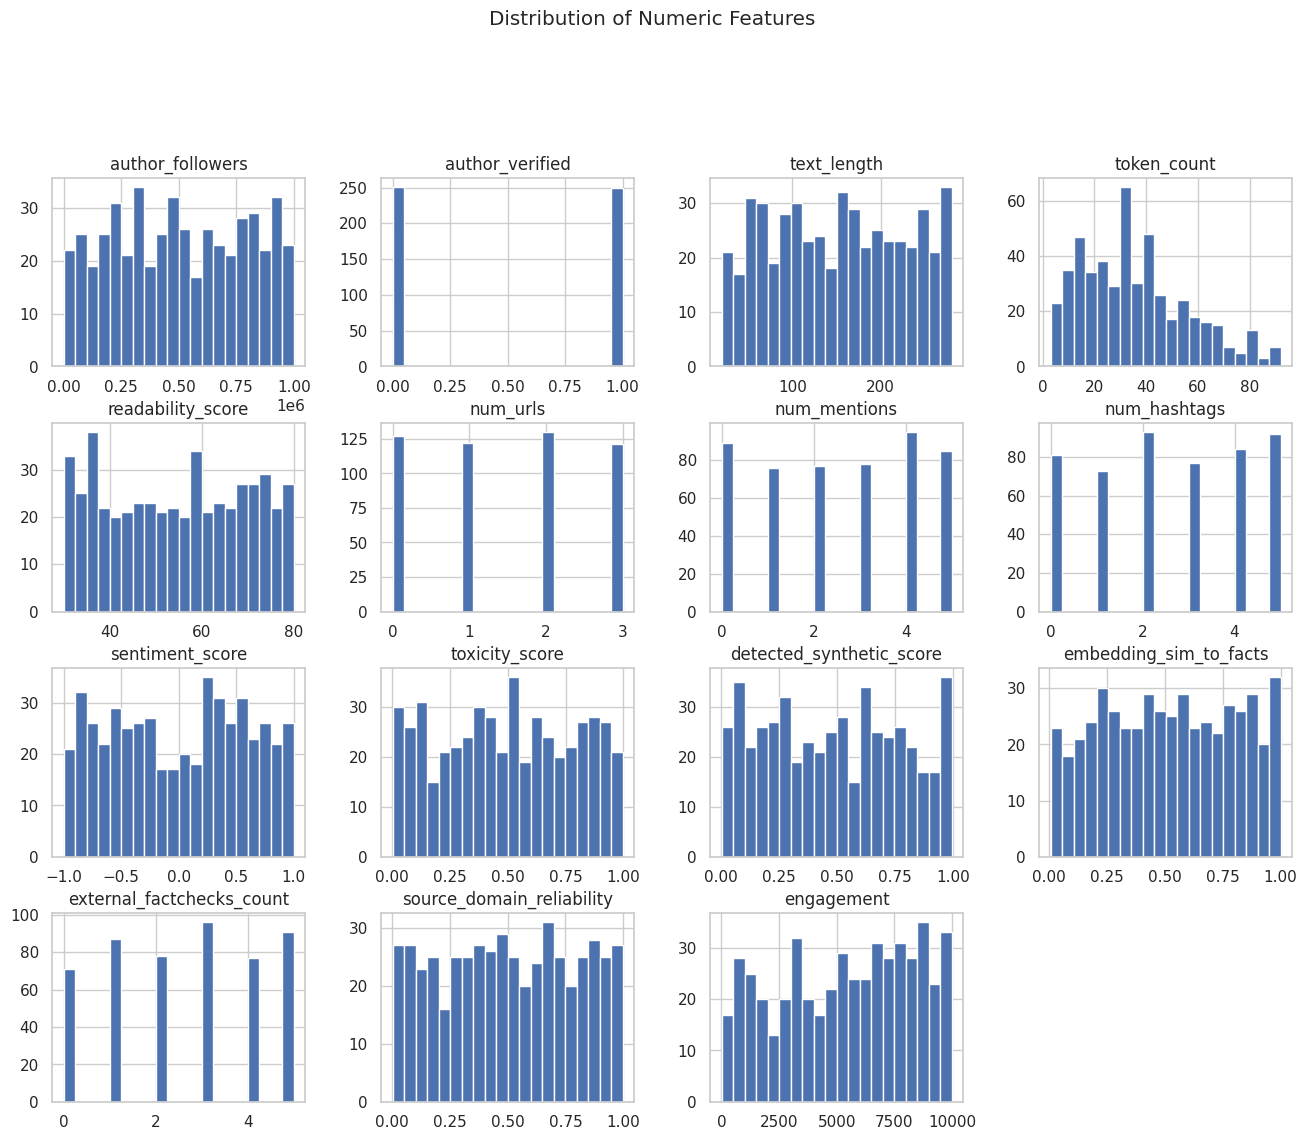

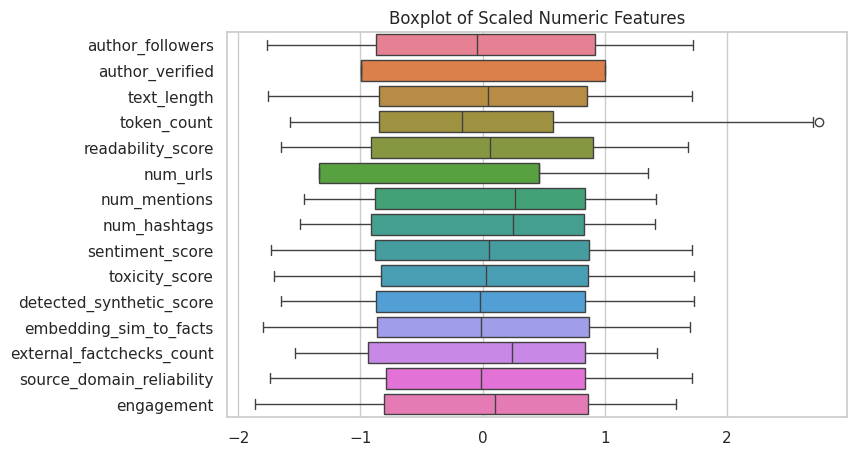

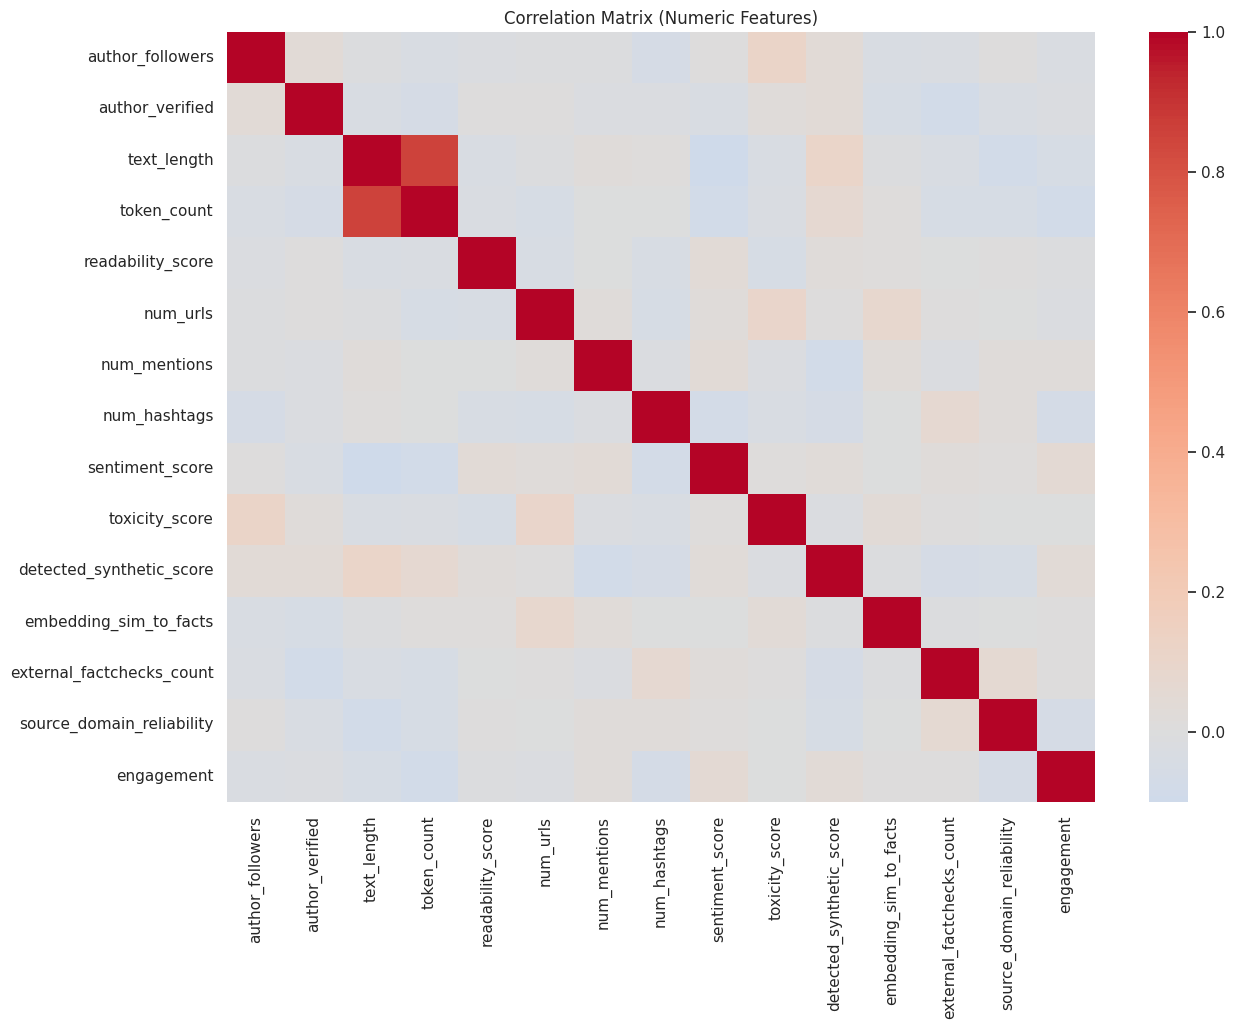


===== platform =====
platform
Twitter     129
Facebook    126
Telegram    124
Reddit      121
Name: count, dtype: int64

===== country =====
country
Germany    113
USA        105
UK         102
Brazil      94
India       86
Name: count, dtype: int64

===== city =====
city
Los Angeles       51
Munich            40
Hamburg           38
Sao Paulo         38
Manchester        36
Berlin            35
Birmingham        34
Delhi             33
Brasilia          33
London            32
New York          30
Mumbai            29
Chicago           24
Bangalore         24
Rio de Janeiro    23
Name: count, dtype: int64

===== timezone =====
timezone
CET    113
EST    105
GMT    102
BRT     94
IST     86
Name: count, dtype: int64

===== model_signature =====
model_signature
human       174
unknown     169
GPT-like    157
Name: count, dtype: int64

===== factcheck_verdict =====
factcheck_verdict
PARTLY        144
TRUE          121
FALSE         120
UNVERIFIED    115
Name: count, dtype: int64


In [ ]:
# Summary Statistics (EDA)

## Summary table for numeric features

numeric_summary = df[numeric_features].describe().T
numeric_summary

  # Looking for:
    ## Large ranges = possible outliers
    ## Highly skewed variables (such as engagements, followers)
    ## Variables with near-zero variance (uninformative)

## Histograms for all numeric features

df[numeric_features].hist(bins=20, figsize=(16, 12))
plt.suptitle("Distribution of Numeric Features", y=1.02)
plt.show()

  # Reveals distribution shape (normal, skewed, multi-modal)

## Boxplot for outlier detection

  # Standardizing the scale of all boxplots, making comparisons more interpretable

from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(df[numeric_features])
scaled_df = pd.DataFrame(scaled, columns=numeric_features)

sns.boxplot(data=scaled_df, orient="h")
plt.title("Boxplot of Scaled Numeric Features")
plt.show()

  # Reveals extreme engagement/score values
  # Extreme outliers can heavily influence our logistic regression and tree splits.

## Correlation matrix (numeric-only)

plt.figure(figsize=(14, 10))
corr = df[numeric_features].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

  # Visualizing relationships between features (referenced in feedback)

## Summary of categorical variables

  # Computing frequency tables for each category

for col in categorical_features:
    print(f"\n===== {col} =====")
    print(df[col].value_counts())

  # Helping with:
    ## Discovering rare categories (may need grouping)
    ## Verifying disribution across platforms, countries, factcheck verdicts
    ## Identifying categorical imbalance





In [ ]:
### PHASE 2: FEATURE ENGINGEERING & PREPROCESSING

# Building the preprocessing pipeline

## Import transformers

from sklearn.preprocessing import StandardScaler, OneHotEncoder
  # StandardScaler: makes numeric features comparable (mean 0, std 1)
  # OneHotEncoder: turns categories into 0/1 columns

from sklearn.feature_extraction.text import TfidfVectorizer
  # TfidfVectorizer: converts text into weighted word features

from sklearn.compose import ColumnTransformer
  # ColumnTransformer: lets us apply all three at once for reproducibility

## Defining per-type transformers

# Numeric: standardize all continuous / count features

numeric_transformer = StandardScaler()
  # Helps linear models (like log. regression and SVM) and makes optimization more stable

# Categorical: one-hot encode, ignore unseen categories at test time

categorical_transformer = OneHotEncoder(handle_unknown="ignore")
  # Preserves all category information without imposing artifical order

# Text: TF–IDF on the main post text
# max_features limits vocab size (important with only 500 rows)

text_transformer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2),       # unigrams + bigrams
    stop_words="english"
)
  # Gives higher weight to words/phrases that are informative for distinguishing misinformation vs. not
  # Down-weights common words

## Building the combined preprocessor
  # Plug the features list into a ColumnTransformer

# Use the actual text column name from text_features list
TEXT_COL = "text"

preprocessor = ColumnTransformer(
    transformers=[
        ("num",  numeric_transformer,      numeric_features),
        ("cat",  categorical_transformer,  categorical_features),
        ("text", text_transformer,         TEXT_COL),
    ],
    remainder="drop"   # drop id/time columns and anything not specified
)

## Sanity check for transformed shape
  # Verifying the preprocessor runs and shows how many features we end up with

# Build X matrix only from columns we intend to use
X = df[numeric_features + categorical_features + [TEXT_COL]]

# Fit the preprocessor on the full data (for inspection)
preprocessor.fit(X)

X_transformed = preprocessor.transform(X)

print("Original shape:", X.shape)
print("Transformed shape:", X_transformed.shape)



Original shape: (500, 22)
Transformed shape: (500, 1051)


In [ ]:
### Phase 3: MODELING

# (1): Train/Test Split

from sklearn.model_selection import train_test_split

TARGET = "is_misinformation"
TEXT_COL = "text"

# X = all features we intend to use
X = df[numeric_features + categorical_features + [TEXT_COL]]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

  # Stratification: keeps fake/real proportions similar in both sets, making evaluation fair
  # Keeping the splits simple, we can layer cross-validation later


Train shape: (350, 22)
Test shape: (150, 22)


(is_misinformation
 1    0.537143
 0    0.462857
 Name: proportion, dtype: float64,
 is_misinformation
 1    0.533333
 0    0.466667
 Name: proportion, dtype: float64)

In [ ]:
# (2): Logistic Regression Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_reg_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(
            max_iter=1000,
        ))
    ]
)

log_reg_pipeline

  # Notes on strucutre
    # Keeps preprocessing and the model tied together to avoid data leakage
    # When we do CV or hyperparameter tuning later, the pipelines ensure preprocessing is refit only on training folds


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['author_followers',
                                                   'author_verified',
                                                   'text_length', 'token_count',
                                                   'readability_score',
                                                   'num_urls', 'num_mentions',
                                                   'num_hashtags',
                                                   'sentiment_score',
                                                   'toxicity_score',
                                                   'detected_synthetic_score',
                                                   'embedding_sim_to_facts',
                                                   'external_factchecks_count',
                                                   'source_domain_reliability',
                                                   'engagement']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['platform', 'country',
                                                   'city', 'timezone',
                                                   'model_signature',
                                                   'factcheck_verdict']),
                                                 ('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words='english'),
                                                  'text')])),
                ('model', LogisticRegression(max_iter=1000))])

In [ ]:
# (3): Fitting the baseline model

log_reg_pipeline.fit(X_train, y_train)

  # During .fit():
    # preprocess:
      # Learns scaling parameters (mean/std) on numeric features
      # Learns one-hot categories
      # Learns TF-IDF vocabulary
    # model:
      # Learns logistic regression coefficients in that transformed space

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['author_followers',
                                                   'author_verified',
                                                   'text_length', 'token_count',
                                                   'readability_score',
                                                   'num_urls', 'num_mentions',
                                                   'num_hashtags',
                                                   'sentiment_score',
                                                   'toxicity_score',
                                                   'detected_synthetic_score',
                                                   'embedding_sim_to_facts',
                                                   'external_factchecks_count',
                                                   'source_domain_reliability',
                                                   'engagement']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['platform', 'country',
                                                   'city', 'timezone',
                                                   'model_signature',
                                                   'factcheck_verdict']),
                                                 ('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words='english'),
                                                  'text')])),
                ('model', LogisticRegression(max_iter=1000))])

In [ ]:
# (4): Evaluate on Test Set
  # Compute: accuracy, ROC-AUC, classificaiton report (precision, recall, F1)

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Class predictions
y_pred = log_reg_pipeline.predict(X_test)

# Predicted probabilities for the positive class
y_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Logistic Regression - Test Accuracy: {acc:.3f}")
print(f"Logistic Regression - Test ROC-AUC: {auc:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

  # Readability
    # We'll look at ROC-AUC and the full classification report to judge performance.


Logistic Regression - Test Accuracy: 0.527
Logistic Regression - Test ROC-AUC: 0.493

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.40      0.44        70
           1       0.55      0.64      0.59        80

    accuracy                           0.53       150
   macro avg       0.52      0.52      0.52       150
weighted avg       0.52      0.53      0.52       150



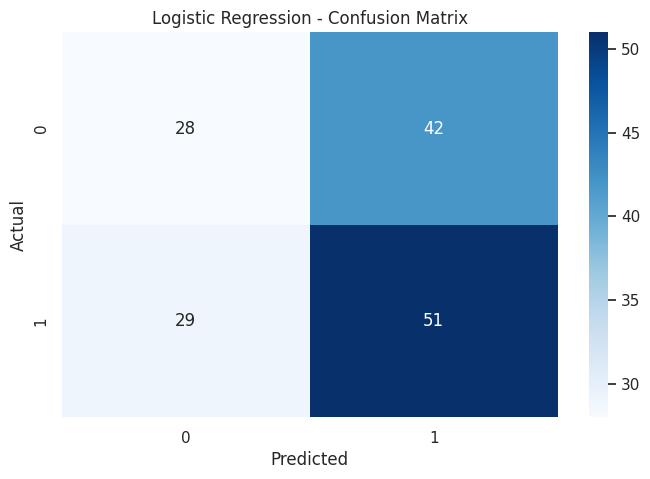

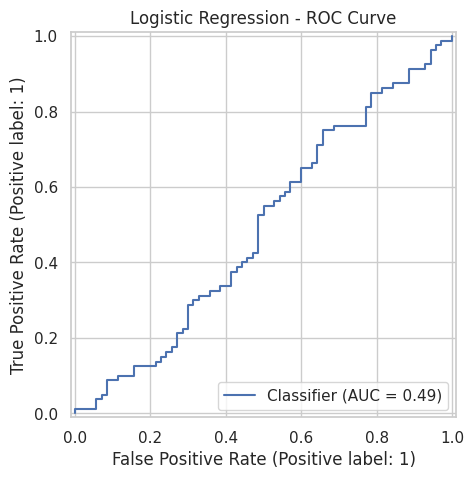

In [ ]:
# (5): Confusion Matrix & ROC Curve

# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

  # Tells us how many fake posts were missed vs correctly caught

# ROC Curve

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("Logistic Regression - ROC Curve")
plt.show()

  # Shows trade-off between true positive rate and fale positive rate at varying thresholds


In [ ]:
### PHASE 4: BUILDING ADDITIONAL MODELS & COMPARING THEM

Decision Tree - Test Accuracy: 0.487
Decision Tree - Test ROC-AUC: 0.506

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.41      0.43        70
           1       0.52      0.55      0.53        80

    accuracy                           0.49       150
   macro avg       0.48      0.48      0.48       150
weighted avg       0.48      0.49      0.48       150



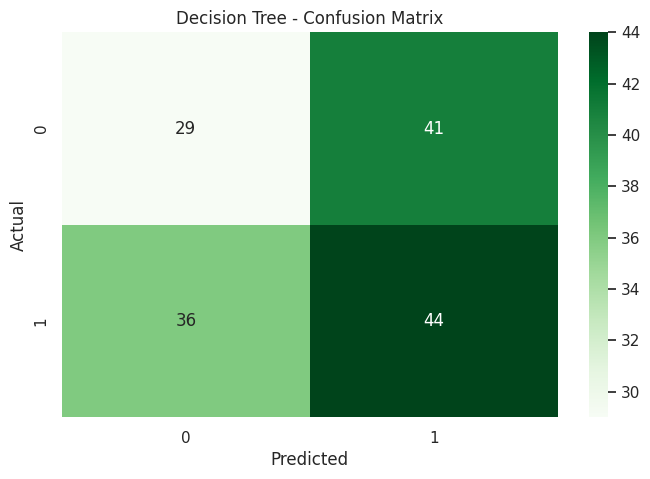

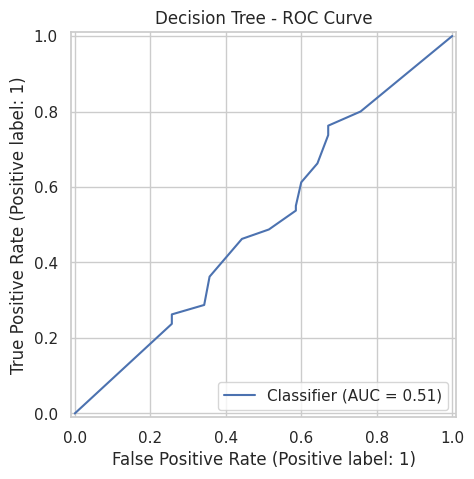

In [ ]:
# Decision tree pipeline

## Import and define model

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Decision tree with modest depth to reduce overfitting a bit
dt_model = DecisionTreeClassifier(
    max_depth=10,      # can tune this later
    min_samples_leaf=5,
    random_state=42
)

dt_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", dt_model)
    ]
)

dt_pipeline

## Fit the decision tree

dt_pipeline.fit(X_train, y_train)

## Evaluate on the test set

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Predictions
y_pred_dt = dt_pipeline.predict(X_test)
y_prob_dt = dt_pipeline.predict_proba(X_test)[:, 1]

acc_dt = accuracy_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

print(f"Decision Tree - Test Accuracy: {acc_dt:.3f}")
print(f"Decision Tree - Test ROC-AUC: {auc_dt:.3f}\n")

print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))

## Confusion matrix and ROC curve

  # Decision Tree

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

  # ROC Curve

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_prob_dt)
plt.title("Decision Tree - ROC Curve")
plt.show()




Random Forest - Test Accuracy: 0.540
Random Forest - Test ROC-AUC: 0.520

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        70
           1       0.54      1.00      0.70        80

    accuracy                           0.54       150
   macro avg       0.77      0.51      0.36       150
weighted avg       0.75      0.54      0.39       150



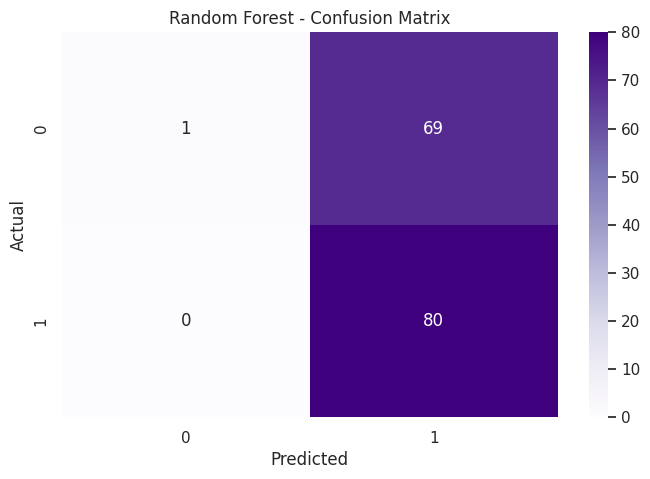

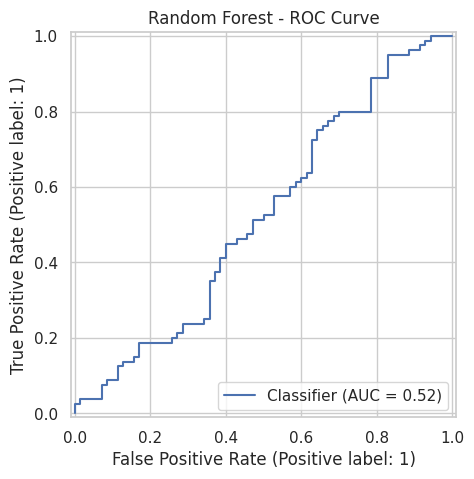

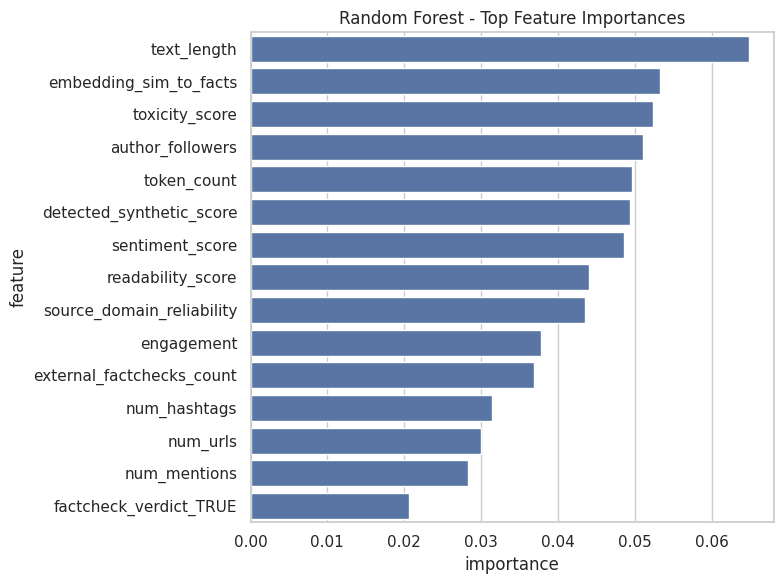

In [ ]:
# Random forest pipeline

## Define the random forest pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_model = RandomForestClassifier(
    n_estimators=300,      # number of trees
    max_depth=None,       # let trees grow deep; can tune later
    min_samples_leaf=5,   # small regularization to reduce overfitting
    n_jobs=-1,            # use all cores
    random_state=42
)

rf_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", rf_model)
    ]
)

rf_pipeline

## Fit the random forest

rf_pipeline.fit(X_train, y_train)

## Evaluate on test set

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Random Forest - Test Accuracy: {acc_rf:.3f}")
print(f"Random Forest - Test ROC-AUC: {auc_rf:.3f}\n")

print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

## Confusion matrix and ROC curve

  # Confusion matric

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

  # ROC Curve

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_prob_rf)
plt.title("Random Forest - ROC Curve")
plt.show()

# Feature importances from the random forest

## Build aligned feature name list

import numpy as np
import pandas as pd

# Grab fitted preprocessor and model from the pipeline
fitted_preprocessor = rf_pipeline.named_steps["preprocess"]
fitted_rf = rf_pipeline.named_steps["model"]

# 1) Numeric feature names (unchanged)
num_names = numeric_features

# 2) Categorical feature names (expanded by one-hot)
cat_encoder = fitted_preprocessor.named_transformers_["cat"]
cat_names = cat_encoder.get_feature_names_out(categorical_features)

# 3) Text feature names from TF-IDF
text_vectorizer = fitted_preprocessor.named_transformers_["text"]
text_names = text_vectorizer.get_feature_names_out()

# Concatenate all
all_feature_names = np.concatenate([num_names, cat_names, text_names])

len(all_feature_names), fitted_rf.feature_importances_.shape

## Get top-k most important features

importances = fitted_rf.feature_importances_

feat_imp = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
})

feat_imp_sorted = feat_imp.sort_values("importance", ascending=False)

# Show top 20
feat_imp_sorted.head(20)

  # ANSWERS: which features does a strong nonlinear model rely on?

## Plot top importances

top_k = 15
top_feats = feat_imp_sorted.head(top_k)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_feats,
    x="importance",
    y="feature"
)
plt.title("Random Forest - Top Feature Importances")
plt.tight_layout()
plt.show()


XGBoost - Test Accuracy: 0.547
XGBoost - Test ROC-AUC: 0.539

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.43      0.47        70
           1       0.57      0.65      0.60        80

    accuracy                           0.55       150
   macro avg       0.54      0.54      0.54       150
weighted avg       0.54      0.55      0.54       150



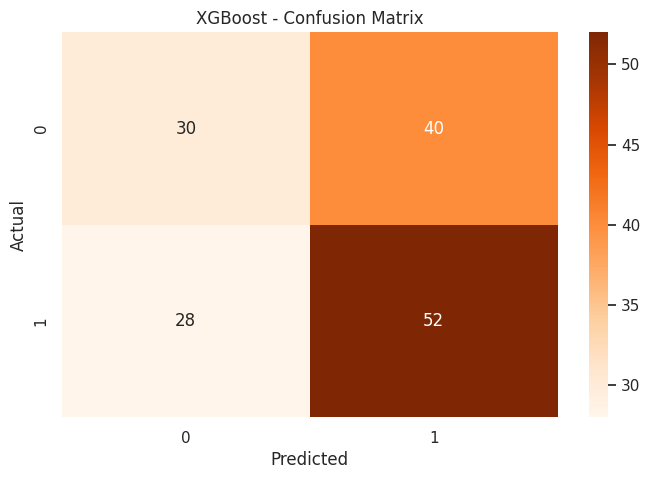

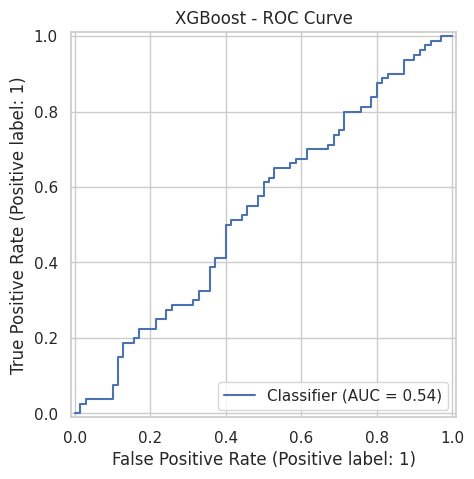

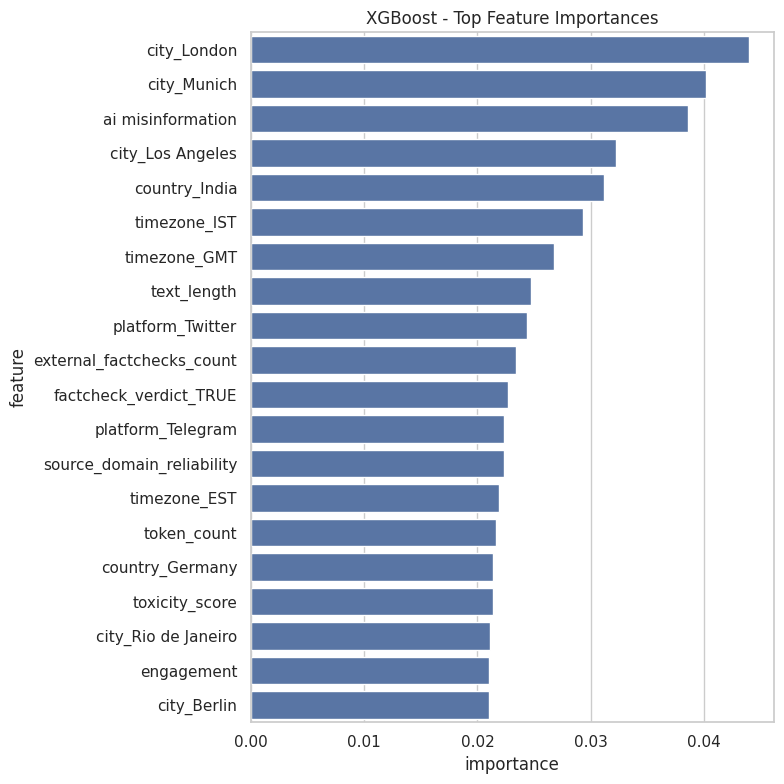

In [ ]:
# Gradient Boost

## Install and import XGBoost

!pip install xgboost

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

## Build XGBoost Pipeline

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42
)

xgb_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", xgb_model)
    ]
)

xgb_pipeline

## Fit the XGBoost pipeline

xgb_pipeline.fit(X_train, y_train)

## Evalaute on test set

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred_xgb = xgb_pipeline.predict(X_test)
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

acc_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f"XGBoost - Test Accuracy: {acc_xgb:.3f}")
print(f"XGBoost - Test ROC-AUC: {auc_xgb:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

## Confusion matrix and ROC curve

  # Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost - Confusion Matrix")
plt.show()

  # ROC Curve

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_prob_xgb)
plt.title("XGBoost - ROC Curve")
plt.show()

# Feature Importances

import numpy as np
import pandas as pd

fitted_preprocessor = xgb_pipeline.named_steps["preprocess"]
fitted_xgb = xgb_pipeline.named_steps["model"]


  # Extract top features

xgb_importances = fitted_xgb.feature_importances_

feat_imp_xgb = pd.DataFrame({
    "feature": all_feature_names,
    "importance": xgb_importances
})

feat_imp_xgb_sorted = feat_imp_xgb.sort_values("importance", ascending=False)

feat_imp_xgb_sorted.head(20)

  # Plot top features

top_k = 20
top_feats_xgb = feat_imp_xgb_sorted.head(top_k)

plt.figure(figsize=(8, 8))
sns.barplot(data=top_feats_xgb, x="importance", y="feature")
plt.title("XGBoost - Top Feature Importances")
plt.tight_layout()
plt.show()






SVM (linear) - Test Accuracy: 0.547
SVM (linear) - Test ROC-AUC: 0.511

SVM (linear) - Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.27      0.36        70
           1       0.55      0.79      0.65        80

    accuracy                           0.55       150
   macro avg       0.54      0.53      0.50       150
weighted avg       0.54      0.55      0.51       150



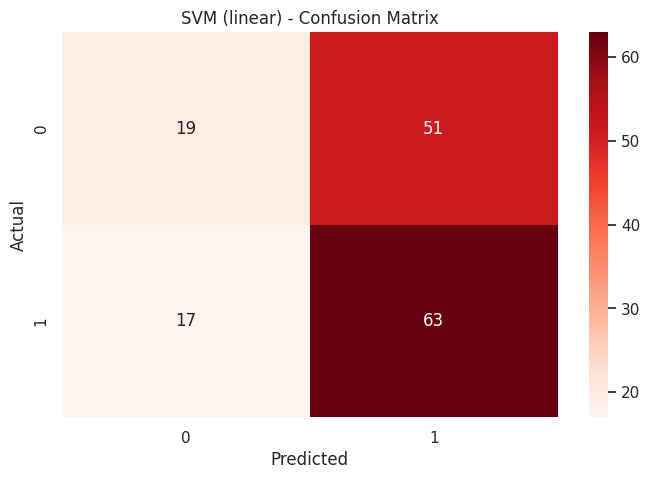

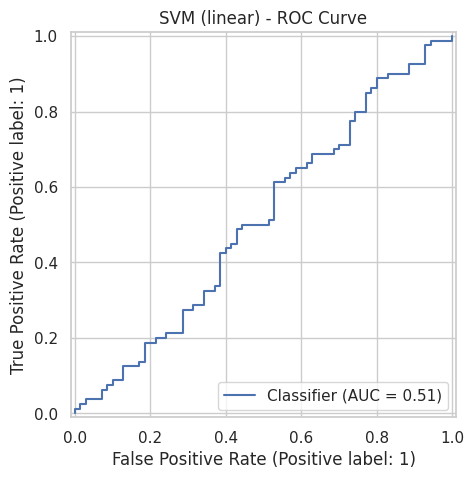

In [ ]:
# SVM

## Define the SVM pipeline

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

svm_model = SVC(
    kernel="linear",      # linear SVM works best with high-dim sparse data
    C=1.0,                # regularization strength (can tune later)
    probability=True,     # enables predict_proba for ROC-AUC
    random_state=42
)

svm_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", svm_model)
    ]
)

svm_pipeline

## Fit the SVM model

svm_pipeline.fit(X_train, y_train)


## Evaluate on test set

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred_svm = svm_pipeline.predict(X_test)
y_prob_svm = svm_pipeline.predict_proba(X_test)[:, 1]

acc_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

print(f"SVM (linear) - Test Accuracy: {acc_svm:.3f}")
print(f"SVM (linear) - Test ROC-AUC: {auc_svm:.3f}\n")

print("SVM (linear) - Classification Report:")
print(classification_report(y_test, y_pred_svm))

## Confusion matrix and ROC curve

  # Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_svm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM (linear) - Confusion Matrix")
plt.show()

  # ROC Curve

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_prob_svm)
plt.title("SVM (linear) - ROC Curve")
plt.show()



In [ ]:
### PHASE 4: MODEL COMPARISON TABLE

## Verifying model labels

y_pred_lr = log_reg_pipeline.predict(X_test)
y_prob_lr = log_reg_pipeline.predict_proba(X_test)[:, 1]

y_pred_dt = dt_pipeline.predict(X_test)
y_prob_dt = dt_pipeline.predict_proba(X_test)[:, 1]

y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

y_pred_xgb = xgb_pipeline.predict(X_test)
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

y_pred_svm = svm_pipeline.predict(X_test)
y_prob_svm = svm_pipeline.predict_proba(X_test)[:, 1]


## Import metric functions

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score
)

## Build comparison table

results = []

def add_results(name, y_true, y_pred, y_prob):
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_true, y_prob),
        "PR-AUC": average_precision_score(y_true, y_prob)
    })


add_results("Logistic Regression", y_test, y_pred_lr, y_prob_lr)
add_results("Decision Tree",       y_test, y_pred_dt, y_prob_dt)
add_results("Random Forest",       y_test, y_pred_rf, y_prob_rf)
add_results("XGBoost",             y_test, y_pred_xgb, y_prob_xgb)
add_results("Linear SVM",          y_test, y_pred_svm, y_prob_svm)

comparison_df = pd.DataFrame(results)
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,PR-AUC
0,Logistic Regression,0.526667,0.548387,0.6375,0.589595,0.492500,0.522097
1,Decision Tree,0.486667,0.517647,0.5500,0.533333,0.505804,0.531295
2,Random Forest,0.540000,0.536913,1.0000,0.698690,0.519643,0.550868
3,XGBoost,0.546667,0.565217,0.6500,0.604651,0.539464,0.555005
4,Linear SVM,0.546667,0.552632,0.7875,0.649485,0.511429,0.542085


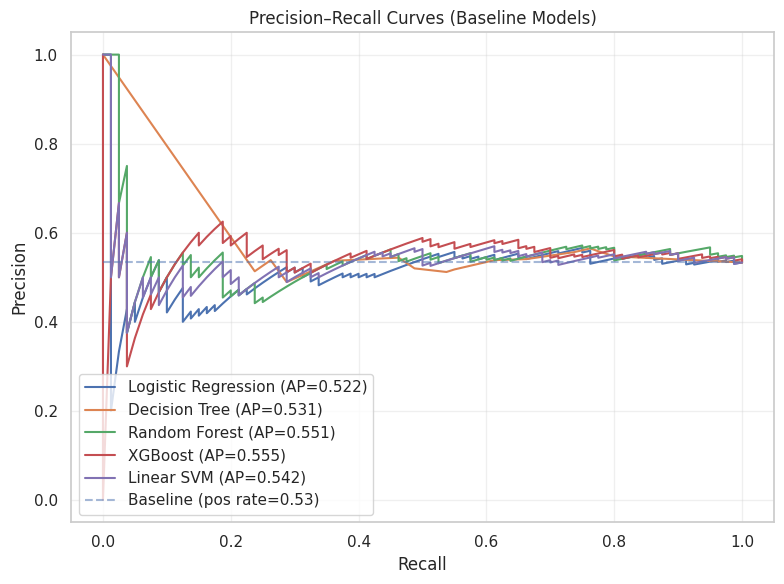

In [ ]:
# Combined Precision-Recall Curve for Baseline Models
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Precision–Recall Curves

plt.figure(figsize=(8, 6))

# Each tuple: (label, predicted_probabilities)
baseline_models_probs = [
    ("Logistic Regression", y_prob_lr),
    ("Decision Tree",       y_prob_dt),
    ("Random Forest",       y_prob_rf),
    ("XGBoost",             y_prob_xgb),
    ("Linear SVM",          y_prob_svm),
]

for name, y_prob in baseline_models_probs:
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")

# Plot the baseline positive rate as a horizontal reference line
pos_rate = y_test.mean()
plt.hlines(pos_rate, 0, 1, linestyles="dashed", alpha=0.5, label=f"Baseline (pos rate={pos_rate:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves (Baseline Models)")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
### PHASE 5: TUNING THE TOP PERFORMERS (AND BASELINE)


In [ ]:
# (1) Linear Regression Tuning

# Import
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from scipy.stats import randint, uniform


# 5-fold stratified CV to keep class balance in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  # StratifiedKFold so each fold preserves the misinformation vs non-misinformation ratio.
  # Grid/Randomized search will train/evaluate on these folds and average ROC-AUC to pick the best hyperparameters.

## CV Tuning: logistic regression (baseline, for interpretability)

log_reg_tuned = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(max_iter=1000))
    ]
)

## Lin. Reg. Hyperparameter Tuning

from sklearn.linear_model import LogisticRegression

log_reg_pipe_cv = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(
            max_iter=1000,
            solver="lbfgs"
        ))
    ]
)

log_reg_param_grid = {
    "model__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}

log_reg_grid = GridSearchCV(
    estimator=log_reg_pipe_cv,
    param_grid=log_reg_param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

log_reg_grid.fit(X_train, y_train)

best_log_reg = log_reg_grid.best_estimator_
print("Best Logistic Regression params:", log_reg_grid.best_params_)
print("Best CV AUC (logistic):", log_reg_grid.best_score_)

# Evaluate tuned logistic on test set
y_pred_logcv = best_log_reg.predict(X_test)
y_prob_logcv = best_log_reg.predict_proba(X_test)[:, 1]




Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Logistic Regression params: {'model__C': 0.01}
Best CV AUC (logistic): 0.46892390296995556


In [ ]:
# (2): XGBoost Tuning

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

# Stratified 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline
xgb_pipe_cv = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", XGBClassifier(
            objective="binary:logistic",
            eval_metric="logloss",
            n_jobs=-1,
            random_state=42
        ))
    ]
)

# Hyperparameter search space
xgb_param_dist = {
    "model__n_estimators": randint(100, 500),       # number of boosting rounds
    "model__max_depth": randint(2, 8),              # tree depth
    "model__learning_rate": uniform(0.01, 0.2),     # step size
    "model__subsample": uniform(0.6, 0.4),          # row subsampling (0.6–1.0)
    "model__colsample_bytree": uniform(0.6, 0.4),   # feature subsampling (0.6–1.0)
}

xgb_rand = RandomizedSearchCV(
    estimator=xgb_pipe_cv,
    param_distributions=xgb_param_dist,
    n_iter=25,                # 25 random combos from the grid
    scoring="roc_auc",        # tune for ROC-AUC across folds
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data (with cross-validation inside)
xgb_rand.fit(X_train, y_train)

# Best model from CV
best_xgb = xgb_rand.best_estimator_
print("Best XGBoost params:", xgb_rand.best_params_)
print("Best CV AUC (XGB):", xgb_rand.best_score_)

# Evaluate tuned XGBoost on test set
y_prob_xgbcv = best_xgb.predict_proba(X_test)[:, 1]
y_pred_xgbcv = (y_prob_xgbcv >= 0.5).astype(int)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best XGBoost params: {'model__colsample_bytree': np.float64(0.9637281608315128), 'model__learning_rate': np.float64(0.061755996320003385), 'model__max_depth': 5, 'model__n_estimators': 101, 'model__subsample': np.float64(0.7700623497964979)}
Best CV AUC (XGB): 0.5124171569895253


In [ ]:
# (3): Linear SVM Tuning

# Import
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

# Stratified 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_pipe_cv = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", SVC(
            kernel="linear",
            probability=True,
            random_state=42
        ))
    ]
)

svm_param_grid = {
    "model__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}

svm_grid = GridSearchCV(
    estimator=svm_pipe_cv,
    param_grid=svm_param_grid,
    scoring="roc_auc",   # tune for ROC-AUC across folds
    cv=cv,
    n_jobs=-1,
    verbose=1
)

svm_grid.fit(X_train, y_train)

best_svm = svm_grid.best_estimator_
print("Best Linear SVM params:", svm_grid.best_params_)
print("Best CV AUC (SVM):", svm_grid.best_score_)

# Evaluate tuned SVM on the held-out test set
y_pred_svmcv = best_svm.predict(X_test)
y_prob_svmcv = best_svm.predict_proba(X_test)[:, 1]


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Linear SVM params: {'model__C': 0.1}
Best CV AUC (SVM): 0.47551497370576323


In [ ]:
# (4): Final Test Evaluation of Tuned Models

# Import
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

final_results = []

def add_model_result(name, y_true, y_pred, y_prob):
    final_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_true, y_prob),
        "PR-AUC": average_precision_score(y_true, y_prob)
    })



# Tuned Logistic Regression

y_pred_logcv = best_log_reg.predict(X_test)
y_prob_logcv = best_log_reg.predict_proba(X_test)[:, 1]

add_model_result("Logistic Regression (Tuned)", y_test, y_pred_logcv, y_prob_logcv)

# Tuned Linear SVM

y_pred_svmcv = best_svm.predict(X_test)
y_prob_svmcv = best_svm.predict_proba(X_test)[:, 1]   # SVC(probability=True)

add_model_result("Linear SVM (Tuned)", y_test, y_pred_svmcv, y_prob_svmcv)


# Tuned XGBoost

y_prob_xgbcv = best_xgb.predict_proba(X_test)[:, 1]
y_pred_xgbcv = (y_prob_xgbcv >= 0.5).astype(int)

add_model_result("XGBoost (Tuned)", y_test, y_pred_xgbcv, y_prob_xgbcv)


# Final comparison table

final_comparison_df = pd.DataFrame(final_results)
print(final_comparison_df)



                         Model  Accuracy  Precision  Recall  F1 Score  \
0  Logistic Regression (Tuned)  0.566667   0.568807   0.775  0.656085   
1           Linear SVM (Tuned)  0.520000   0.545455   0.600  0.571429   
2              XGBoost (Tuned)  0.540000   0.567901   0.575  0.571429   

    ROC-AUC    PR-AUC  
0  0.501429  0.515110  
1  0.504643  0.514579  
2  0.558214  0.591484  


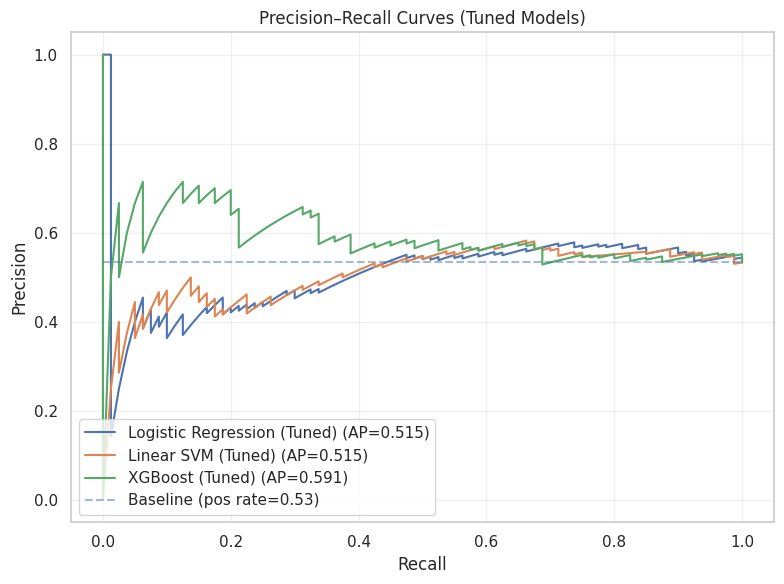

In [ ]:
# Precision-Recall Curve for Tuned Models

# Import

from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

tuned_models_probs = [
    ("Logistic Regression (Tuned)", y_prob_logcv),
    ("Linear SVM (Tuned)",          y_prob_svmcv),
    ("XGBoost (Tuned)",             y_prob_xgbcv),
]

for name, y_prob in tuned_models_probs:
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")

# same positive-rate reference line
pos_rate = y_test.mean()
plt.hlines(pos_rate, 0, 1, linestyles="dashed", alpha=0.5,
           label=f"Baseline (pos rate={pos_rate:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves (Tuned Models)")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



6.1: Target Variable Distribution (Class Imbalance)



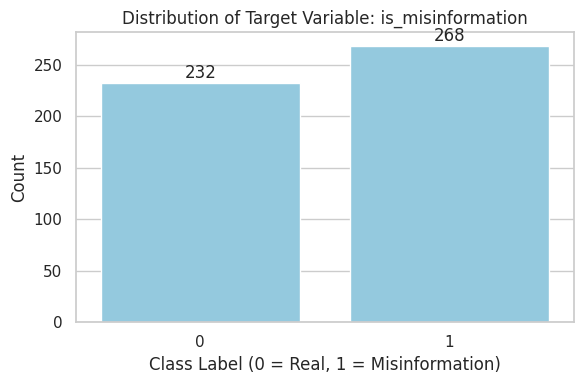


6.2: Feature Group Summary

Numeric features (15):
['author_followers', 'author_verified', 'text_length', 'token_count', 'readability_score', 'num_urls', 'num_mentions', 'num_hashtags', 'sentiment_score', 'toxicity_score', 'detected_synthetic_score', 'embedding_sim_to_facts', 'external_factchecks_count', 'source_domain_reliability', 'engagement']

Categorical features (6):
['platform', 'country', 'city', 'timezone', 'model_signature', 'factcheck_verdict']

Text feature:
['text']

Transformed feature count: 1051

6.3: Key EDA Highlights

Numeric feature summary:

                           count           mean            std      min  \
author_followers           500.0  505745.980000  286939.981829  146.000   
author_verified            500.0       0.498000       0.500497    0.000   
text_length                500.0     151.638000      74.874504   20.000   
token_count                500.0      35.472000      20.564704    3.000   
readability_score          500.0      54.689620      14

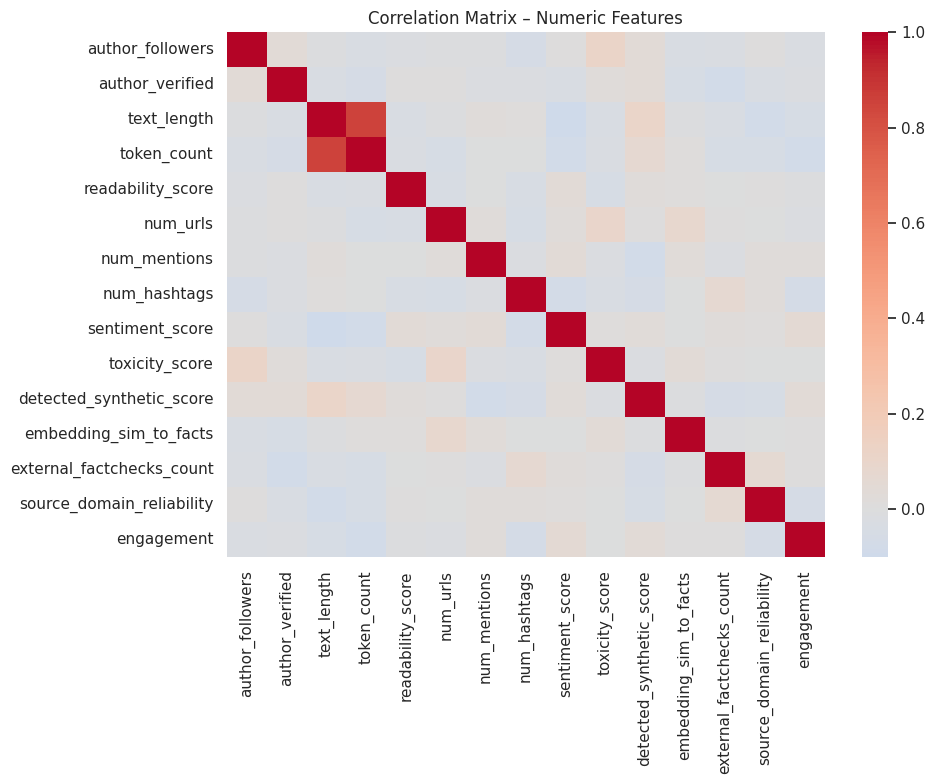

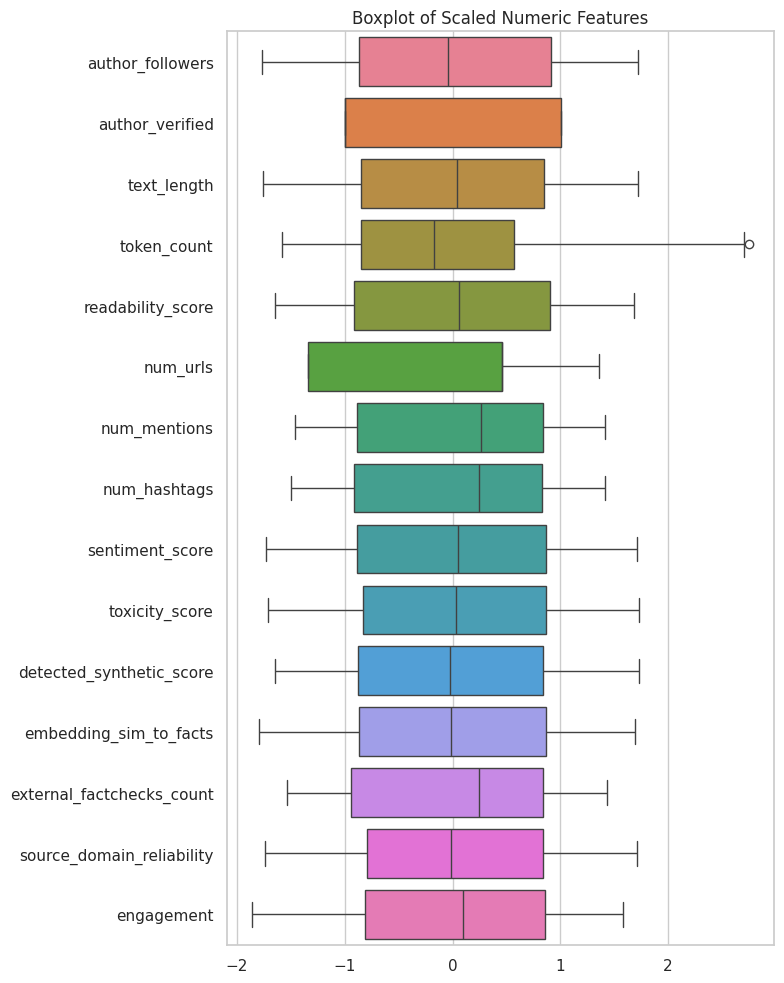


Categorical feature distributions:

===== platform =====
platform
Twitter     129
Facebook    126
Telegram    124
Reddit      121
Name: count, dtype: int64

===== country =====
country
Germany    113
USA        105
UK         102
Brazil      94
India       86
Name: count, dtype: int64

===== city =====
city
Los Angeles       51
Munich            40
Hamburg           38
Sao Paulo         38
Manchester        36
Berlin            35
Birmingham        34
Delhi             33
Brasilia          33
London            32
New York          30
Mumbai            29
Chicago           24
Bangalore         24
Rio de Janeiro    23
Name: count, dtype: int64

===== timezone =====
timezone
CET    113
EST    105
GMT    102
BRT     94
IST     86
Name: count, dtype: int64

===== model_signature =====
model_signature
human       174
unknown     169
GPT-like    157
Name: count, dtype: int64

===== factcheck_verdict =====
factcheck_verdict
PARTLY        144
TRUE          121
FALSE         120
UNVERIFIED    1

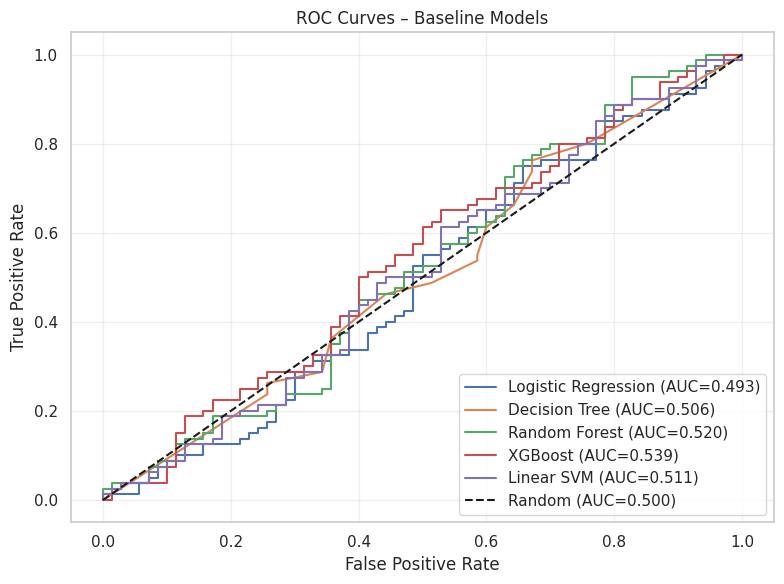

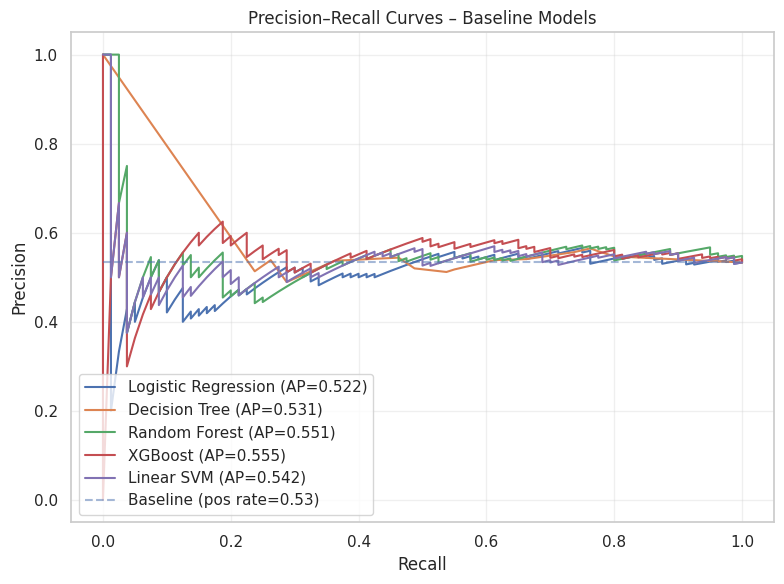


6.5: Tuned Model Comparison (LogReg, Linear SVM, XGBoost)


Tuned Model Comparison Table:

                      Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC   PR-AUC
Logistic Regression (Tuned)  0.566667   0.568807   0.775  0.656085 0.501429 0.515110
         Linear SVM (Tuned)  0.520000   0.545455   0.600  0.571429 0.504643 0.514579
            XGBoost (Tuned)  0.540000   0.567901   0.575  0.571429 0.558214 0.591484


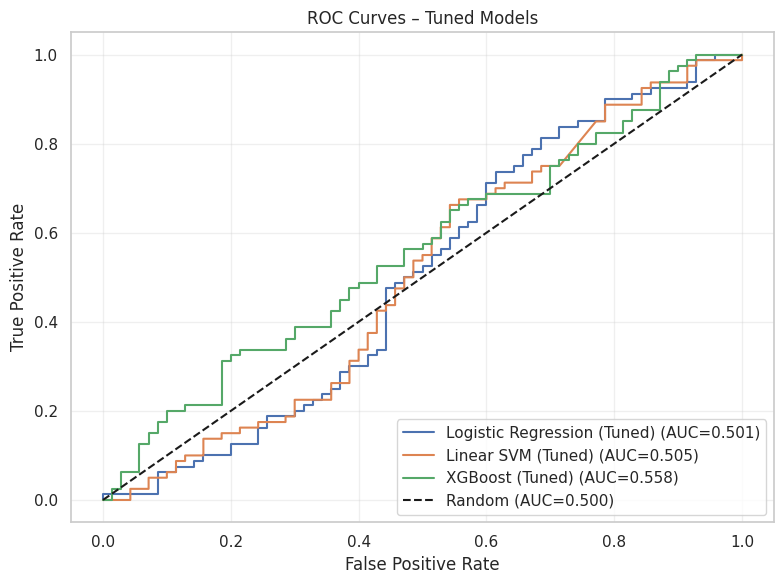

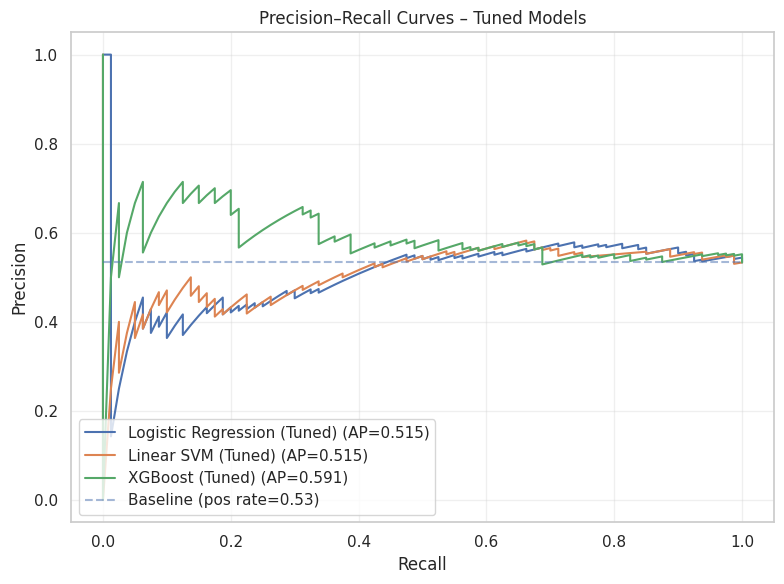


6.6: Combined Model Comparison (Baseline + Tuned)


Combined Comparison Table (All Models):

                      Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC   PR-AUC
        Logistic Regression  0.526667   0.548387  0.6375  0.589595 0.492500 0.522097
              Decision Tree  0.486667   0.517647  0.5500  0.533333 0.505804 0.531295
              Random Forest  0.540000   0.536913  1.0000  0.698690 0.519643 0.550868
                    XGBoost  0.546667   0.565217  0.6500  0.604651 0.539464 0.555005
                 Linear SVM  0.546667   0.552632  0.7875  0.649485 0.511429 0.542085
Logistic Regression (Tuned)  0.566667   0.568807  0.7750  0.656085 0.501429 0.515110
         Linear SVM (Tuned)  0.520000   0.545455  0.6000  0.571429 0.504643 0.514579
            XGBoost (Tuned)  0.540000   0.567901  0.5750  0.571429 0.558214 0.591484


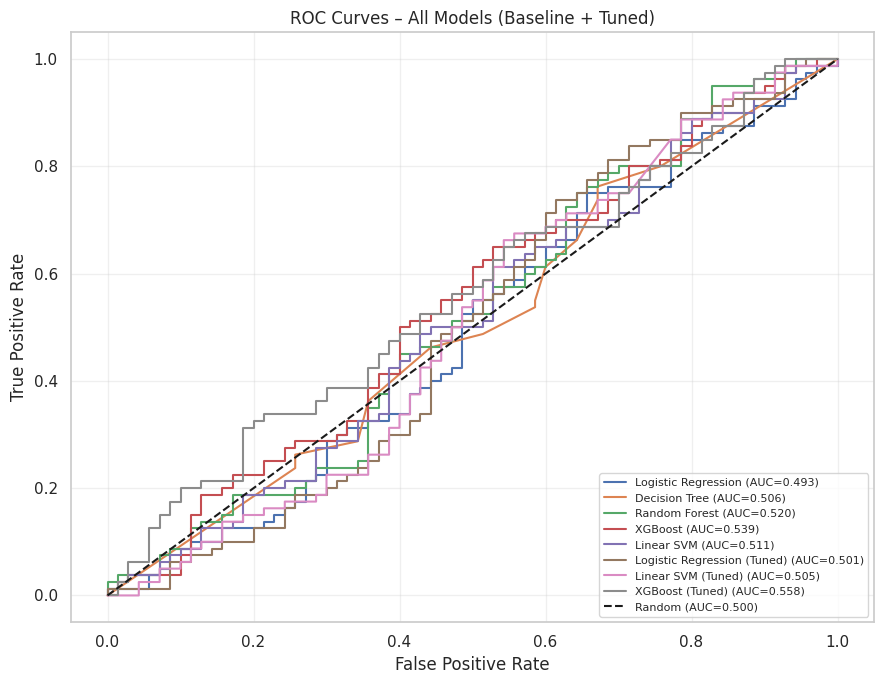

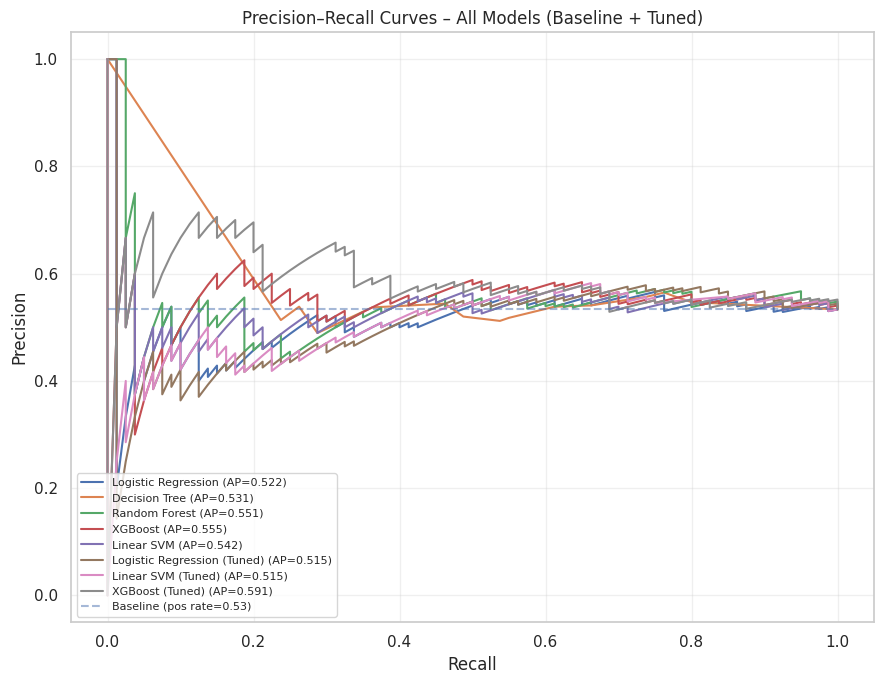


Ranking by Accuracy:

                      Model  Accuracy
Logistic Regression (Tuned)  0.566667
                    XGBoost  0.546667
                 Linear SVM  0.546667
              Random Forest  0.540000
            XGBoost (Tuned)  0.540000
        Logistic Regression  0.526667
         Linear SVM (Tuned)  0.520000
              Decision Tree  0.486667

Ranking by Precision:

                      Model  Precision
Logistic Regression (Tuned)   0.568807
            XGBoost (Tuned)   0.567901
                    XGBoost   0.565217
                 Linear SVM   0.552632
        Logistic Regression   0.548387
         Linear SVM (Tuned)   0.545455
              Random Forest   0.536913
              Decision Tree   0.517647

Ranking by Recall:

                      Model  Recall
              Random Forest  1.0000
                 Linear SVM  0.7875
Logistic Regression (Tuned)  0.7750
                    XGBoost  0.6500
        Logistic Regression  0.6375
         Linear SVM (Tu

In [ ]:
### PHASE 6: SUMMARY METRICS AND VISUALIZATIONS

# 6.1: Target Variable Distribution (Class Imbalance)

print("\n==============================")
print("6.1: Target Variable Distribution (Class Imbalance)")
print("==============================\n")

import matplotlib.pyplot as plt
import seaborn as sns

# Compute class counts
class_counts = y.value_counts().sort_index()  # If your target variable is named y

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, color="skyblue")

plt.title("Distribution of Target Variable: is_misinformation")
plt.xlabel("Class Label (0 = Real, 1 = Misinformation)")
plt.ylabel("Count")

# Annotate bars
for idx, value in enumerate(class_counts.values):
    plt.text(idx, value + 5, str(value), ha='center')

plt.tight_layout()
plt.show()

# Print the positive rate for reference
pos_rate = class_counts[1] / class_counts.sum()
pos_rate

# 6.2: Feature Group Summary

print("\n==============================")
print("6.2: Feature Group Summary")
print("==============================\n")

print("Numeric features ({}):".format(len(numeric_features)))
print(numeric_features)

print("\nCategorical features ({}):".format(len(categorical_features)))
print(categorical_features)

print("\nText feature:")
print(text_features)

print("\nTransformed feature count:", preprocessor.transform(X).shape[1])

# 6.3: Key EDA Highlights

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

print("\n==============================")
print("6.3: Key EDA Highlights")
print("==============================\n")

# 1) Summary statistics for numeric features
print("Numeric feature summary:\n")
numeric_summary = df[numeric_features].describe().T
print(numeric_summary)

# 2) Correlation matrix (numeric-only)
plt.figure(figsize=(10, 8))
corr = df[numeric_features].corr()
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Matrix – Numeric Features")
plt.tight_layout()
plt.show()

# 3) Boxplot of scaled numeric features (outlier / spread overview)
scaler = StandardScaler()
scaled = scaler.fit_transform(df[numeric_features])
scaled_df = pd.DataFrame(scaled, columns=numeric_features)

plt.figure(figsize=(8, 10))
sns.boxplot(data=scaled_df, orient="h")
plt.title("Boxplot of Scaled Numeric Features")
plt.tight_layout()
plt.show()

# 4) Frequency tables for categorical features
print("\nCategorical feature distributions:\n")
for col in categorical_features:
    print(f"===== {col} =====")
    print(df[col].value_counts())
    print()

# 6.4: Baseline Model Comparison

print("\n==============================")
print("6.4: Baseline Model Comparison (All 5 Models)")
print("==============================\n")

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    roc_curve,
    precision_recall_curve
)
import pandas as pd
import matplotlib.pyplot as plt

# Predictions & probabilities for baseline models

y_pred_lr  = log_reg_pipeline.predict(X_test)
y_prob_lr  = log_reg_pipeline.predict_proba(X_test)[:, 1]

y_pred_dt  = dt_pipeline.predict(X_test)
y_prob_dt  = dt_pipeline.predict_proba(X_test)[:, 1]

y_pred_rf  = rf_pipeline.predict(X_test)
y_prob_rf  = rf_pipeline.predict_proba(X_test)[:, 1]

y_pred_xgb = xgb_pipeline.predict(X_test)
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

y_pred_svm = svm_pipeline.predict(X_test)
y_prob_svm = svm_pipeline.predict_proba(X_test)[:, 1]

# Build baseline comparison table

def collect_metrics(name, y_true, y_pred, y_prob):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_true, y_prob),
        "PR-AUC": average_precision_score(y_true, y_prob)
    }

baseline_results = [
    collect_metrics("Logistic Regression", y_test, y_pred_lr,  y_prob_lr),
    collect_metrics("Decision Tree",       y_test, y_pred_dt,  y_prob_dt),
    collect_metrics("Random Forest",       y_test, y_pred_rf,  y_prob_rf),
    collect_metrics("XGBoost",             y_test, y_pred_xgb, y_prob_xgb),
    collect_metrics("Linear SVM",          y_test, y_pred_svm, y_prob_svm),
]

baseline_comparison_df = pd.DataFrame(baseline_results)

print("\nBaseline Model Comparison Table:\n")
print(baseline_comparison_df.to_string(index=False))

baseline_comparison_df

# Combined ROC curves for baseline models

plt.figure(figsize=(8, 6))

baseline_probs = [
    ("Logistic Regression", y_prob_lr),
    ("Decision Tree",       y_prob_dt),
    ("Random Forest",       y_prob_rf),
    ("XGBoost",             y_prob_xgb),
    ("Linear SVM",          y_prob_svm),
]

for name, y_prob in baseline_probs:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_val = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val:.3f})")

# Chance line
plt.plot([0, 1], [0, 1], "k--", label="Random (AUC=0.500)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Baseline Models")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Combined Precision–Recall curves for baseline models

plt.figure(figsize=(8, 6))

for name, y_prob in baseline_probs:
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")

# Baseline positive rate as reference line
pos_rate = y_test.mean()
plt.hlines(pos_rate, 0, 1, linestyles="dashed", alpha=0.5,
           label=f"Baseline (pos rate={pos_rate:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves – Baseline Models")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 6.5: Tuned Model Comparison

print("\n==============================")
print("6.5: Tuned Model Comparison (LogReg, Linear SVM, XGBoost)")
print("==============================\n")

# Predictions for tuned Logistic Regression
y_pred_logcv = best_log_reg.predict(X_test)
y_prob_logcv = best_log_reg.predict_proba(X_test)[:, 1]

# Predictions for tuned Linear SVM
y_pred_svmcv = best_svm.predict(X_test)
y_prob_svmcv = best_svm.predict_proba(X_test)[:, 1]

# Predictions for tuned XGBoost
y_pred_xgbcv = best_xgb.predict(X_test)
y_prob_xgbcv = best_xgb.predict_proba(X_test)[:, 1]

#  Build Tuned Comparison Table

tuned_results = []

tuned_results.append(collect_metrics("Logistic Regression (Tuned)", y_test, y_pred_logcv, y_prob_logcv))
tuned_results.append(collect_metrics("Linear SVM (Tuned)",          y_test, y_pred_svmcv, y_prob_svmcv))
tuned_results.append(collect_metrics("XGBoost (Tuned)",             y_test, y_pred_xgbcv, y_prob_xgbcv))

tuned_comparison_df = pd.DataFrame(tuned_results)

print("\nTuned Model Comparison Table:\n")
print(tuned_comparison_df.to_string(index=False))

#  Combined ROC Curves for Tuned Models

plt.figure(figsize=(8, 6))

tuned_probs = [
    ("Logistic Regression (Tuned)", y_prob_logcv),
    ("Linear SVM (Tuned)",          y_prob_svmcv),
    ("XGBoost (Tuned)",             y_prob_xgbcv)
]

for name, y_prob in tuned_probs:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_val = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random (AUC=0.500)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Tuned Models")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#  Combined Precision–Recall Curves for Tuned Models

plt.figure(figsize=(8, 6))

for name, y_prob in tuned_probs:
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")

# Baseline positive rate
pos_rate = y_test.mean()
plt.hlines(pos_rate, 0, 1, linestyles="dashed", alpha=0.5,
           label=f"Baseline (pos rate={pos_rate:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves – Tuned Models")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# 6.6: Combined Baseline + Tuned Model Comparison


print("\n==============================")
print("6.6: Combined Model Comparison (Baseline + Tuned)")
print("==============================\n")

# Merge baseline and tuned results
combined_results = baseline_results + tuned_results
combined_df = pd.DataFrame(combined_results)

print("\nCombined Comparison Table (All Models):\n")
print(combined_df.to_string(index=False))

#  Combined ROC Curves for ALL Models

plt.figure(figsize=(9, 7))

all_models_probs = [
    ("Logistic Regression",            y_prob_lr),
    ("Decision Tree",                  y_prob_dt),
    ("Random Forest",                  y_prob_rf),
    ("XGBoost",                        y_prob_xgb),
    ("Linear SVM",                     y_prob_svm),
    ("Logistic Regression (Tuned)",    y_prob_logcv),
    ("Linear SVM (Tuned)",             y_prob_svmcv),
    ("XGBoost (Tuned)",                y_prob_xgbcv)
]

for name, y_prob in all_models_probs:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_val = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random (AUC=0.500)")
plt.title("ROC Curves – All Models (Baseline + Tuned)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#  Combined Precision–Recall Curves for ALL Models

plt.figure(figsize=(9, 7))

for name, y_prob in all_models_probs:
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")

pos_rate = y_test.mean()
plt.hlines(pos_rate, 0, 1, linestyles="dashed", alpha=0.5,
           label=f"Baseline (pos rate={pos_rate:.2f})")

plt.title("Precision–Recall Curves – All Models (Baseline + Tuned)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left", fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#  RANKING MODELS BY EACH METRIC

metrics_to_rank = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC", "PR-AUC"]

ranking_tables = {}

for metric in metrics_to_rank:
    ranking = combined_df[["Model", metric]].sort_values(metric, ascending=False)
    ranking_tables[metric] = ranking
    print(f"\nRanking by {metric}:\n")
    print(ranking.to_string(index=False))


